In [2]:
# MATPLOTLIB INTERACTIVE VISUALIZATION. REMOVE (OR COMMENT) IF YOU NEED TO PRINT THE NOTEBOOK AS A PDF, SOMETIMES IT DOES NOT WORK WELL...
#%matplotlib widget

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# pd.options.display.max_rows = 9999
pd.options.display.max_columns = 200

#set initial random state
rs = 328537
np.random.seed(rs)

In [3]:
DATASETPATH = "./data/DSL_Winter_Project_2024/DSL_Winter_Project_2024/development.csv"
dataset = pd.read_csv(DATASETPATH)

display(dataset)

,x,y,pmax[0],negpmax[0],area[0],tmax[0],rms[0],pmax[1],negpmax[1],area[1],tmax[1],rms[1],pmax[2],negpmax[2],area[2],tmax[2],rms[2],pmax[3],negpmax[3],area[3],tmax[3],rms[3],pmax[4],negpmax[4],area[4],tmax[4],rms[4],pmax[5],negpmax[5],area[5],tmax[5],rms[5],pmax[6],negpmax[6],area[6],tmax[6],rms[6],pmax[7],negpmax[7],area[7],tmax[7],rms[7],pmax[8],negpmax[8],area[8],tmax[8],rms[8],pmax[9],negpmax[9],area[9],tmax[9],rms[9],pmax[10],negpmax[10],area[10],tmax[10],rms[10],pmax[11],negpmax[11],area[11],tmax[11],rms[11],pmax[12],negpmax[12],area[12],tmax[12],rms[12],pmax[13],negpmax[13],area[13],tmax[13],rms[13],pmax[14],negpmax[14],area[14],tmax[14],rms[14],pmax[15],negpmax[15],area[15],tmax[15],rms[15],pmax[16],negpmax[16],area[16],tmax[16],rms[16],pmax[17],negpmax[17],area[17],tmax[17],rms[17]
0,200.0,200.0,4.066907,-17.690173,2.847932,0.600000,2.007042,5.409161,-17.721210,4.538778,22.600000,1.563902,6.084506,-19.892543,3.132328,72.2,1.456865,3.811328,-23.747293,3.621973,15.200000,1.531228,4.893027,-18.008972,7.215259,70.594160,0.938042,9.322305,-19.477101,5.520791,72.400000,1.412877,3.077338,-19.239130,2.079597,28.400000,1.242361,3.633856,-17.555292,1.456941,66.400000,1.521403,26.581253,-15.625539,13.374258,72.200000,1.211460,99.361264,-56.828006,48.422567,72.0,0.971254,42.068393,-19.716336,23.152819,72.000000,1.285425,12.438458,-18.148151,7.611376,72.200000,0.904157,4.559802,-18.432141,2.288938,38.40000,0.939772,7.454877,-16.861163,4.191909,72.600000,1.184943,6.611877,-17.685799,4.884680,162.800000,1.284969,149.648736,-18.546884,146.036298,72.276594,1.196239,607.109118,-36.282996,583.899899,72.373094,0.374498,614.916861,-39.848523,591.852768,72.331028,0.405595
1,200.0,200.0,5.916801,-4.717111,5.792778,79.765174,1.564535,4.414289,-4.736827,3.720435,111.875058,1.228058,4.507257,-3.787175,3.267461,55.0,1.709002,3.940369,-5.427002,3.444678,200.200000,1.172497,5.549379,-4.670676,6.666403,156.598535,1.109768,9.373914,-3.896777,6.821667,71.000000,1.489011,5.424356,-4.675986,5.481520,70.600000,1.684811,5.126883,-4.857126,4.561109,181.200000,1.356535,27.797015,-11.742902,14.334657,71.000000,1.248869,96.062561,-58.803436,47.559857,70.8,1.646606,38.690210,-19.613623,20.574321,70.800000,1.236410,12.326212,-5.670920,8.025536,119.600000,1.201039,15.498431,-6.770750,11.107231,119.84105,1.483650,18.472514,-3.372324,16.620582,119.812512,1.578009,13.802252,-5.154840,8.758870,120.000000,1.093953,148.942977,-4.697864,171.081604,71.065221,1.534433,630.348007,-39.715988,580.042799,71.029155,0.403258,624.950701,-41.266681,586.569646,71.089058,0.405890
2,200.0,200.0,4.286652,-5.316132,2.356390,74.600000,1.404622,4.567191,-5.985437,3.490490,107.800000,1.015408,5.384155,-3.948853,2.929150,28.0,1.373336,4.903412,-4.559235,1.223700,204.600000,1.508628,3.795407,-4.761539,1.397493,71.800000,1.121483,7.499896,-5.343427,7.260222,71.800000,1.547936,5.846233,-5.021164,6.073777,71.541859,1.529981,4.284341,-5.049019,3.330127,17.229922,1.636174,23.163651,-11.581955,11.901321,71.800000,1.712700,93.767398,-62.801328,46.121189,71.6,1.509499,40.337067,-23.637970,19.456946,71.600000,1.973803,9.253250,-4.282883,4.517316,71.800000,1.995394,4.168692,-4.282668,2.504671,141.60000,2.004948,7.336668,-5.742383,11.792258,71.908212,1.333036,5.940039,-3.860550,5.340140,6.614830,1.183951,153.494632,-4.584915,137.502422,71.869933,1.010175,613.880342,-40.679678,580.407491,71.892264,0.568777,596.437125,-42.712286,574.091695,71.943934,0.498019
3,200.0,200.0,4.003635,-4.617459,2.189005,43.000000,1.512162,5.019058,-4.229949,6.786200,175.600000,1.350620,4.165598,-5.576041,1.544370,14.0,1.115078,3.791672,-4.981216,2.985681,104.000000,1.374108,4.848719,-3.985501,5.184150,197.725932,1.849099,10.422260,-4.916791,5.480527,72.400000,0.809550,5.157927,-3.594675,9.393185,72.081513,1.633162,2.999829,-6.250171,2.250264,1.600000,1.737832,26.592899,-10.409299,12.231570,72.200000,0.825131,89.620438,-62.658493,48.821906,72.0,1.945644,37.796774,-21.114725,20.897897,72.000000,1.224526,10.900876,-5.595096

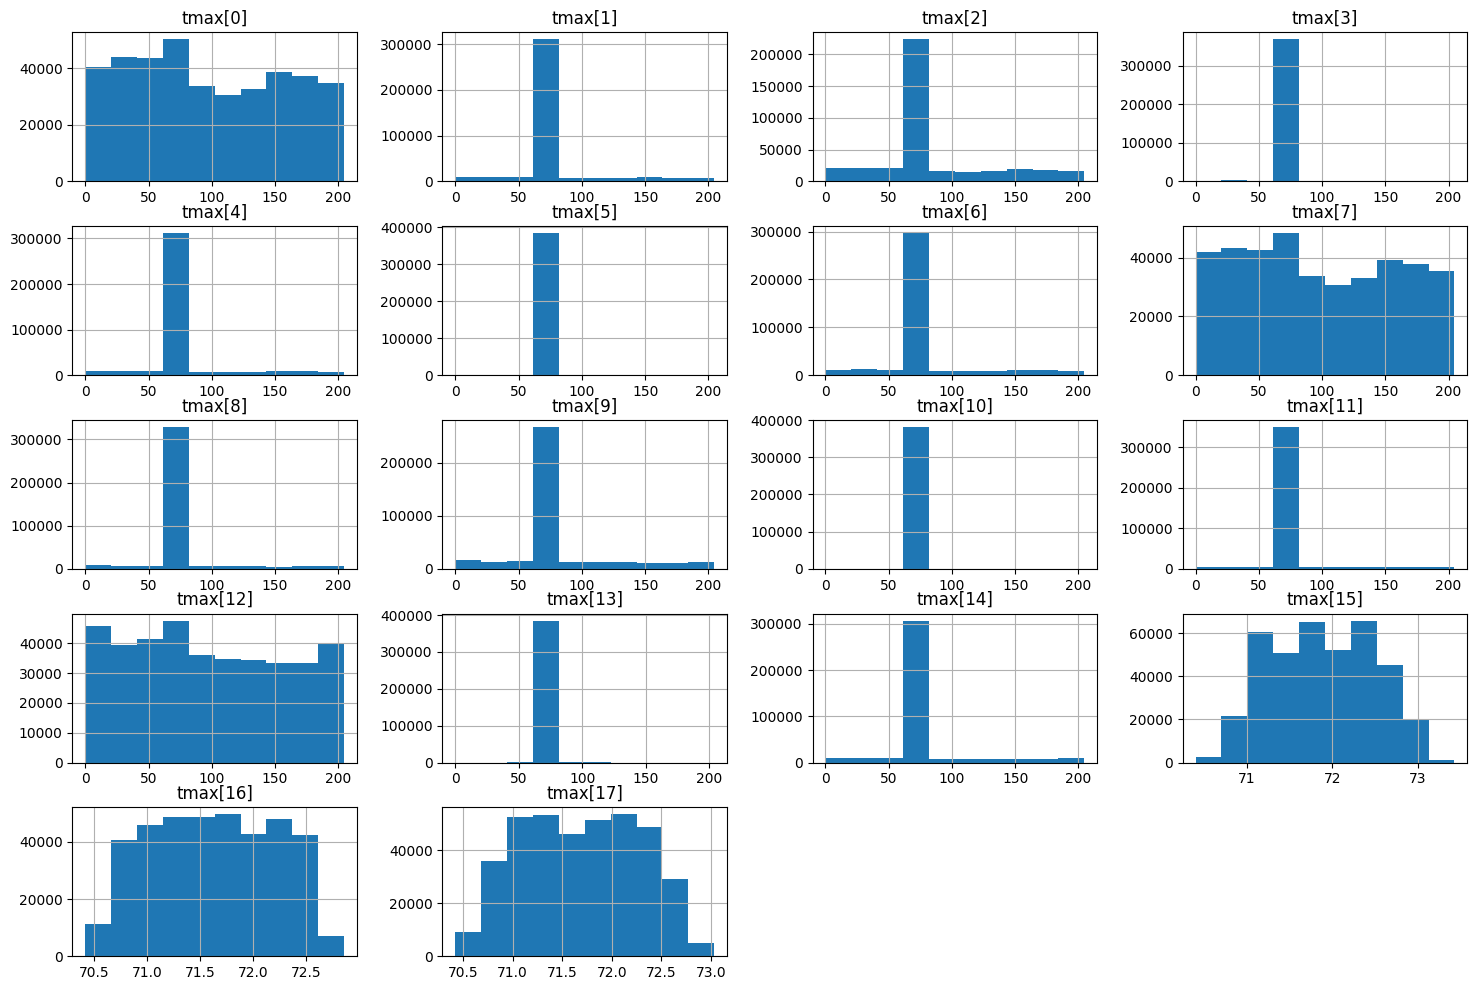

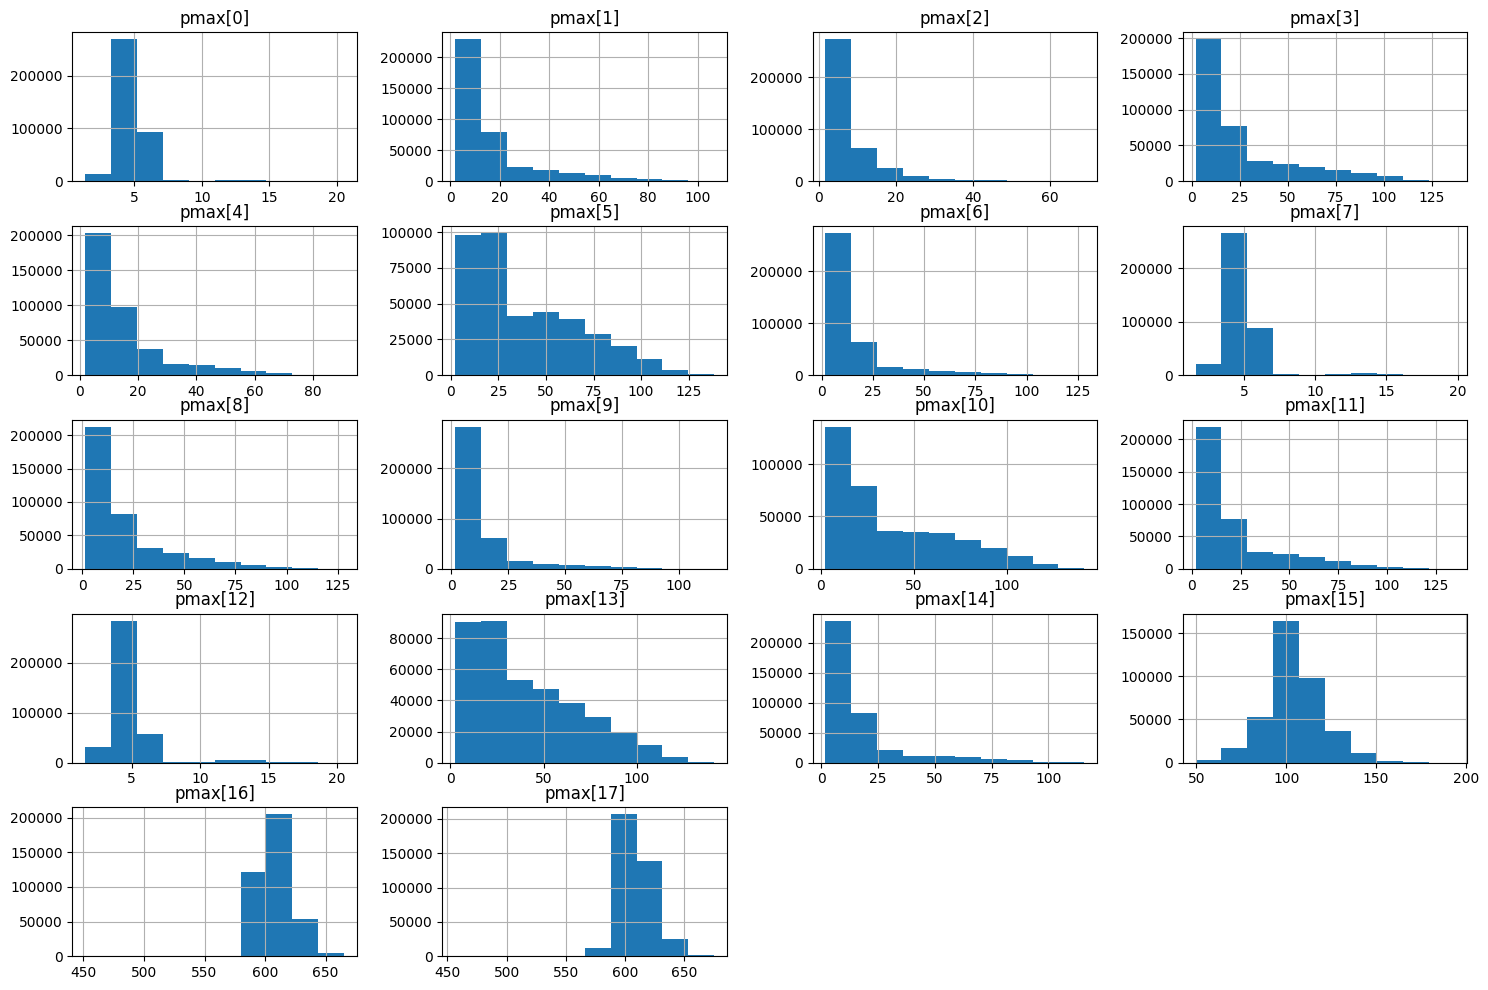

In [21]:
def generateColumnsNames(title):
    out = []
    for i in range(0, 18):
        out.append( title + "[" + str(i) + "]" )
    return out

columnTitles = ["tmax", "pmax"]
for columnTitle in columnTitles:
    columns = generateColumnsNames(columnTitle)
    dataset.hist(bins=10, column=columns, figsize=(18,12))


<Axes: title={'center': 'Position of the datapoints'}, xlabel='x', ylabel='y'>

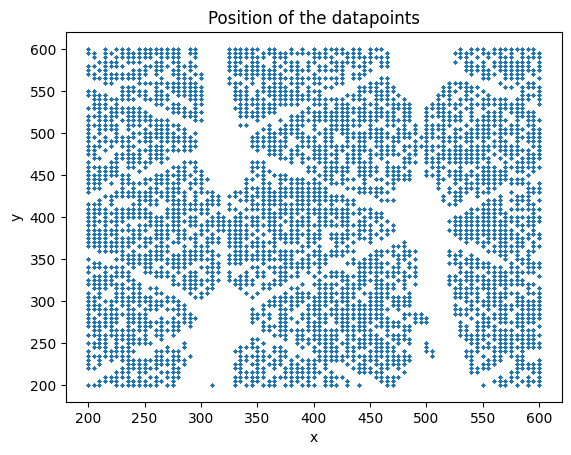

In [5]:
dataset.plot.scatter("x", "y", alpha=0.1, s=2, title="Position of the datapoints")

In [18]:
def generateColumnsNamesFromIndexes(indexes):
    out = []
    for index in indexes:
        for label in ["pmax", "negpmax", "area", "tmax", "rms"]:
            out.append(label + "[" + str(index) + "]")
    return out

regressionTargets = ['x', 'y']
noisyFeatures= generateColumnsNamesFromIndexes(["0", "7", "12", "15", "16", "17"])
featuresLabels = dataset.columns.drop(np.hstack([regressionTargets, noisyFeatures]))
X_df = dataset[featuresLabels]
Y_df = dataset[regressionTargets]

<Figure size 640x480 with 0 Axes>

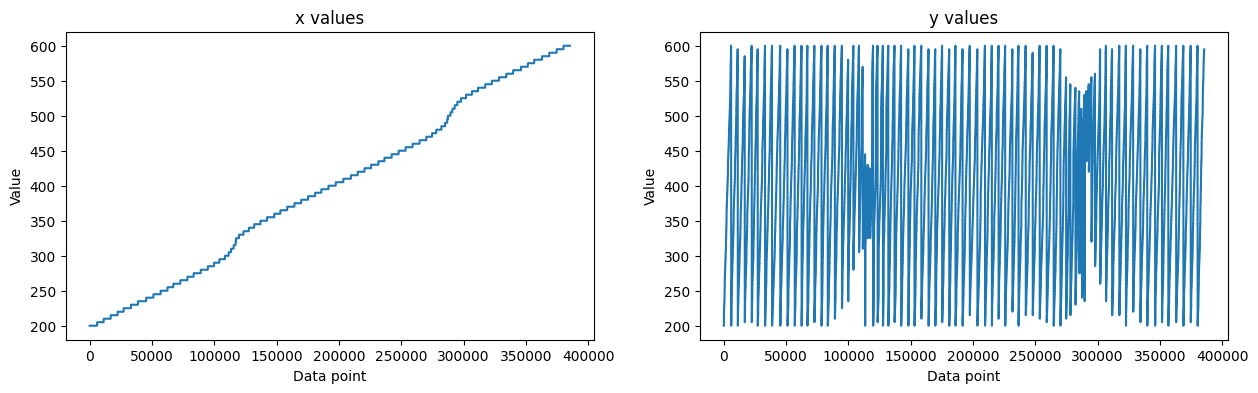

In [33]:
plt.figure()
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
ax[0].plot(Y_df['x'])
ax[0].set_title("x values")
ax[0].set_xlabel("Data point")
ax[0].set_ylabel("Value")
ax[1].plot(Y_df['y'])
ax[1].set_title("y values")
ax[1].set_xlabel("Data point")
ax[1].set_ylabel("Value")
plt.show()

<Figure size 640x480 with 0 Axes>

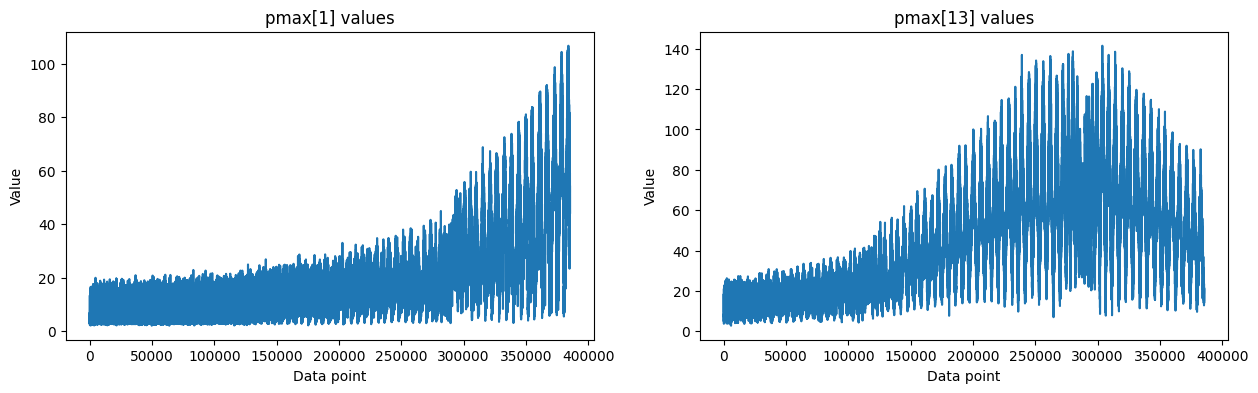

In [46]:
plt.figure()
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
ax[0].plot(X_df['pmax[1]'])
ax[0].set_title("pmax[1] values")
ax[0].set_xlabel("Data point")
ax[0].set_ylabel("Value")
ax[1].plot(X_df['pmax[13]'])
ax[1].set_title("pmax[13] values")
ax[1].set_xlabel("Data point")
ax[1].set_ylabel("Value")
plt.show()